In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.dtypes  ## Checking the data types 

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.isnull().sum()   ## Checking null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.shape  ## Checking number of rows and columns of data

(200, 5)

In [7]:
df.describe()   ## Checking summary statistics of data

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

Checking Ouliers


<Axes: >

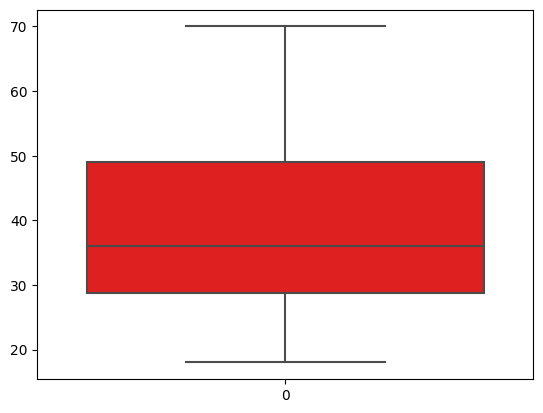

In [9]:
sns.boxplot(df['Age'],color='red')

<Axes: >

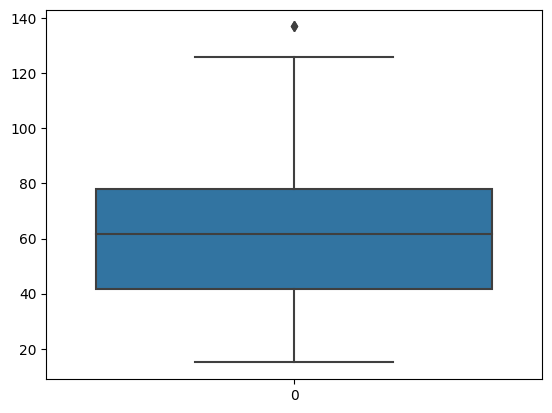

In [10]:
sns.boxplot(df['Annual Income (k$)'])

Removing outliers from above boxplot


In [11]:
Q1=df['Annual Income (k$)'].quantile(0.25)
Q3=df['Annual Income (k$)'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

36.5


In [12]:
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

In [13]:
df['Annual Income (k$)'].median()

61.5

In [14]:
z_scores=stats.zscore(df['Annual Income (k$)'])
threshold=61.5
Annual_Income= df[(z_scores < threshold) & (z_scores > -threshold)]

<Axes: >

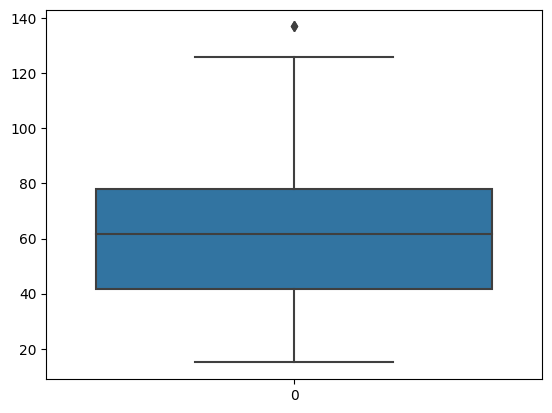

In [15]:
sns.boxplot(Annual_Income['Annual Income (k$)'])

In [16]:
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>Upper_limit,61.5,df['Annual Income (k$)'])

<Axes: >

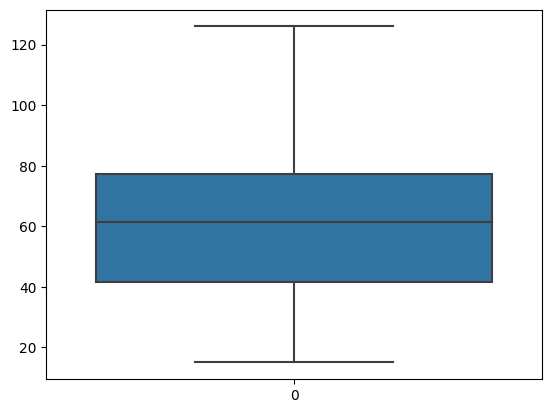

In [17]:
sns.boxplot(df['Annual Income (k$)'])

Checking correlation after removing outliers

In [18]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.970787,0.013835
Gender,0.057400,1.000000,0.060867,0.024997,-0.058109
Age,-0.026763,0.060867,1.000000,0.004013,-0.327227
Annual Income (k$),0.970787,0.024997,0.004013,1.000000,0.010007
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.010007,1.000000


<Axes: >

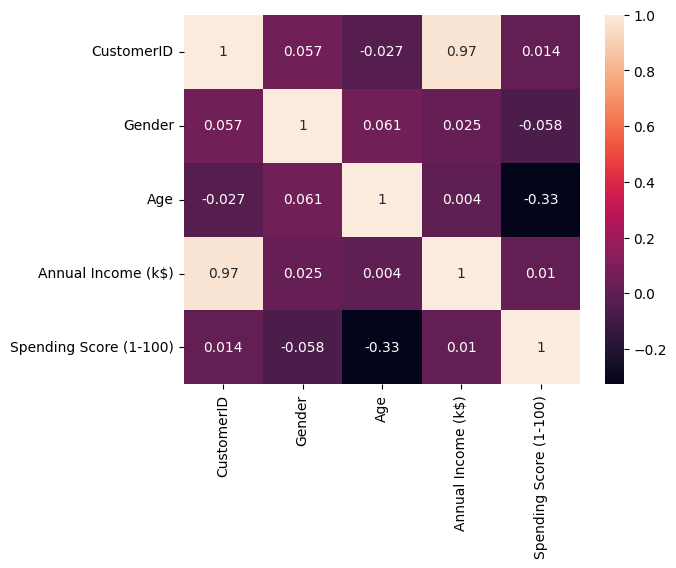

In [19]:
sns.heatmap(df.corr(),annot=True)

Data scaling

In [20]:
from sklearn.preprocessing import StandardScaler
x=df.copy()
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)

In [21]:
x1=pd.DataFrame(x_scaled)
x1.head()

,0,1,2,3,4
0,-1.723412,1.128152,-1.424569,-1.788777,-0.434801
1,-1.706091,1.128152,-1.281035,-1.788777,1.195704
2,-1.688771,-0.886405,-1.352802,-1.748853,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.748853,1.040418
4,-1.654129,-0.886405,-0.563369,-1.708930,-0.395980


We are using PCA for dimension reduction

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x_scaled)
new_ds = pd.DataFrame(pca.transform(x_scaled), columns=(["col1","col2","col3"]))
new_ds.describe()

,col1,col2,col3
count,200.000000,2.000000e+02,2.000000e+02
mean,0.000000,-1.154632e-16,2.220446e-17
std,1.408800,1.163758e+00,9.906587e-01
min,-2.484859,-2.192097e+00,-1.425478e+00
25%,-1.180446,-9.944752e-01,-8.887870e-01
50%,0.048906,8.105412e-03,-5.127897e-01
75%,1.104238,1.059576e+00,9.685679e-01
max,3.149170,2.733202e+00,1.709541e+00


In [23]:
from sklearn import cluster

In [25]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
      kmeans =KMeans(n_clusters=i,init = 'k-means++',random_state=0)
      kmeans.fit(new_ds)
      wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

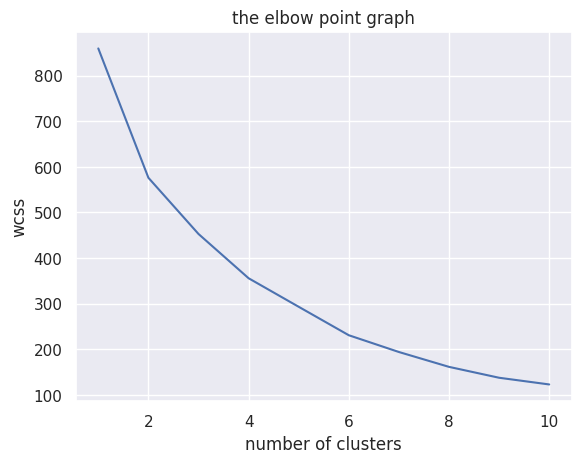

In [26]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('the elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Performed K-means clustering on the dataset to group customers into fivew clusters based on their spending behaviour and anuual income.

In [ ]:
y